In [3]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5750,2398-YPMUR,Female,1,Yes,No,13,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.15,916.75,Yes
3065,5133-POWUA,Male,0,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,45.80,45.8,No
2773,2770-NSVDG,Male,0,Yes,No,24,No,No phone service,DSL,No,...,Yes,No,No,No,Month-to-month,No,Electronic check,29.10,688,No
1145,3522-CDKHF,Female,0,Yes,No,32,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.50,2324.7,No
2864,1564-HJUVY,Male,0,No,No,4,Yes,No,DSL,No,...,No,Yes,Yes,No,Month-to-month,Yes,Bank transfer (automatic),63.75,226.2,No


In [5]:
df.drop("customerID" ,axis='columns', inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [7]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
df1 = df[df.TotalCharges!=' ']
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\royal\AppData\Local\Temp\ipykernel_30868\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [10]:
df1.replace("No internet service", 'No', inplace=True)
df1.replace("No phone service", 'No', inplace=True)

C:\Users\royal\AppData\Local\Temp\ipykernel_30868\625972513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No internet service", 'No', inplace=True)
C:\Users\royal\AppData\Local\Temp\ipykernel_30868\625972513.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No phone service", 'No', inplace=True)


In [11]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\royal\AppData\Local\Temp\ipykernel_30868\1648037665.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1,'No': 0},inplace=True)


In [12]:
df1['gender'].replace({'Female':1, 'Male':0}, inplace=True)

C:\Users\royal\AppData\Local\Temp\ipykernel_30868\3951318906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1, 'Male':0}, inplace=True)


In [13]:
df2 = pd.get_dummies(data=df1,columns=['InternetService', 'Contract', 'PaymentMethod'])

In [14]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [15]:
x = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [17]:
from tensorflow import keras

In [27]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 2s 3ms/step - loss: 0.5333 - accuracy: 0.7109
Epoch 2/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4331 - accuracy: 0.7908
Epoch 3/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4215 - accuracy: 0.7982
Epoch 4/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4174 - accuracy: 0.8073
Epoch 5/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4140 - accuracy: 0.8055
Epoch 6/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4122 - accuracy: 0.8080
Epoch 7/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4101 - accuracy: 0.8091
Epoch 8/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4084 - accuracy: 0.8087
Epoch 9/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4066 - accuracy: 0.8091
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4060 - accura

176/176 [==============================] - 1s 3ms/step - loss: 0.3691 - accuracy: 0.8254
Epoch 82/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3683 - accuracy: 0.8256
Epoch 83/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3674 - accuracy: 0.8299
Epoch 84/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3676 - accuracy: 0.8283
Epoch 85/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3684 - accuracy: 0.8247
Epoch 86/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3682 - accuracy: 0.8256
Epoch 87/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3677 - accuracy: 0.8245
Epoch 88/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3669 - accuracy: 0.8293
Epoch 89/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3656 - accuracy: 0.8276
Epoch 90/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3667 - accuracy: 

In [28]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 3ms/step - loss: 0.4830 - accuracy: 0.7754


[0.4830174446105957, 0.7754086852073669]

In [20]:
yp = model.predict(X_test)
y_pred = []
for ele in yp:
    if ele > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

44/44 [==============================] - 0s 4ms/step


In [21]:
y_pred[:10]

[0, 1, 0, 1, 1, 1, 0, 0, 0, 1]

In [22]:
y_test[:10]

C:\Users\royal\AppData\Local\Temp\ipykernel_30868\2588316582.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test[:10]


2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       999
           1       0.63      0.52      0.57       408

    accuracy                           0.77      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.76      0.77      0.77      1407



Text(95.72222222222221, 0.5, 'Truth')

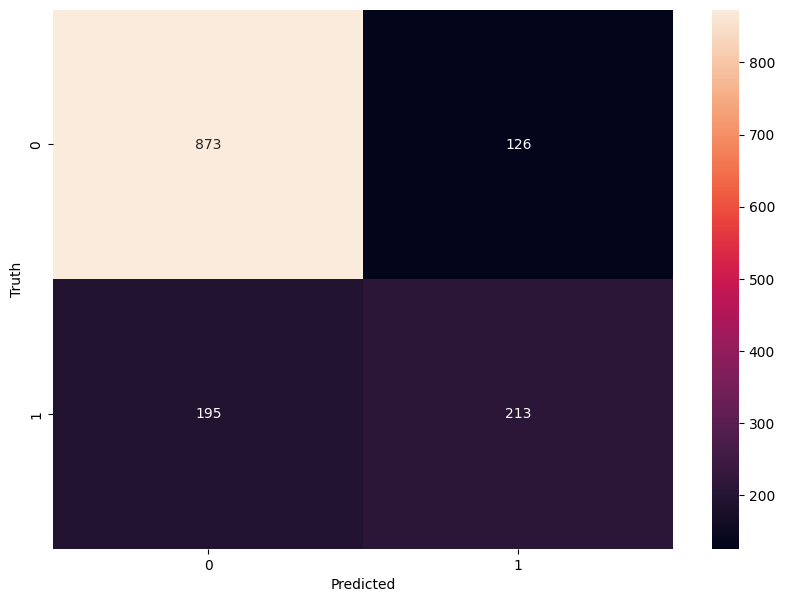

In [24]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [29]:
modeld = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])
modeld.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
modeld.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 3s 4ms/step - loss: 0.6241 - accuracy: 0.6606
Epoch 2/100
176/176 [==============================] - 1s 4ms/step - loss: 0.5278 - accuracy: 0.7328
Epoch 3/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4929 - accuracy: 0.7483
Epoch 4/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4761 - accuracy: 0.7609
Epoch 5/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4754 - accuracy: 0.7559
Epoch 6/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4675 - accuracy: 0.7696
Epoch 7/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4645 - accuracy: 0.7700
Epoch 8/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4642 - accuracy: 0.7708
Epoch 9/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4596 - accuracy: 0.7748
Epoch 10/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4561 - accura

176/176 [==============================] - 1s 3ms/step - loss: 0.4279 - accuracy: 0.7954
Epoch 82/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4178 - accuracy: 0.7993
Epoch 83/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4240 - accuracy: 0.7954
Epoch 84/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4266 - accuracy: 0.7980
Epoch 85/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4239 - accuracy: 0.7943
Epoch 86/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4212 - accuracy: 0.7940
Epoch 87/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4205 - accuracy: 0.8002
Epoch 88/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4200 - accuracy: 0.7977
Epoch 89/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4218 - accuracy: 0.7943
Epoch 90/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4194 - accuracy: 

In [30]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 3ms/step - loss: 0.4830 - accuracy: 0.7754


[0.4830174446105957, 0.7754086852073669]